In [1]:
import numpy as np
import pandas as pd


# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()


In [2]:
# lets first read the csv ddqata file using pandas
data = pd.read_csv(r'C:\Prject\Data analysis\Visual data analysis in Python\telecom_churn.csv')

In [4]:
#lets explore the data
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Churn, is our target variable. It is binary: True indicates that that the company eventually lost this customer, and False indicates that the customer was retained.

In [5]:
print(data.info())
print(data.describe())
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

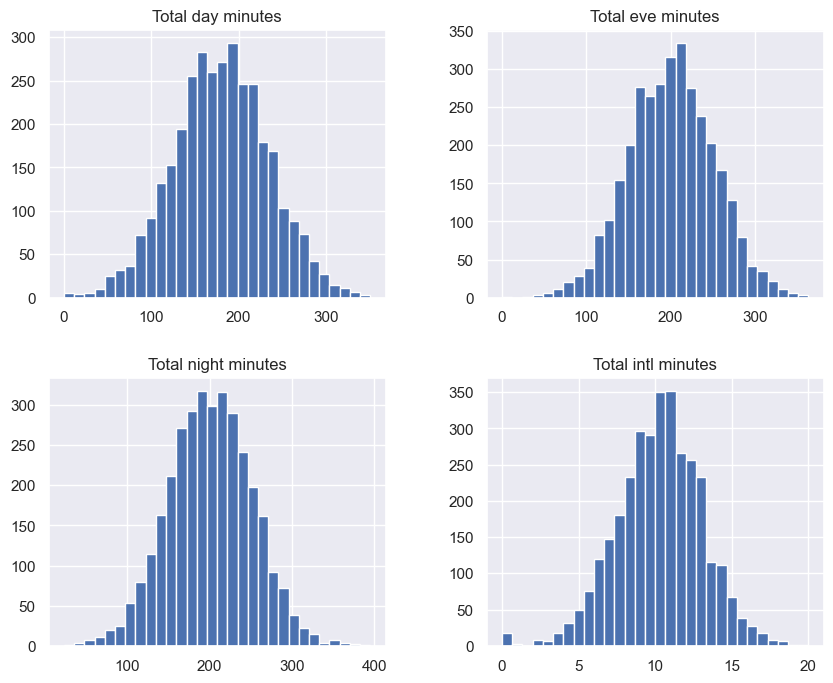

In [14]:
# let first do the total ay call and internation calls miniutes analysis  
features=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']    
data[features].hist(bins=30, figsize=(10, 8))
plt.show()

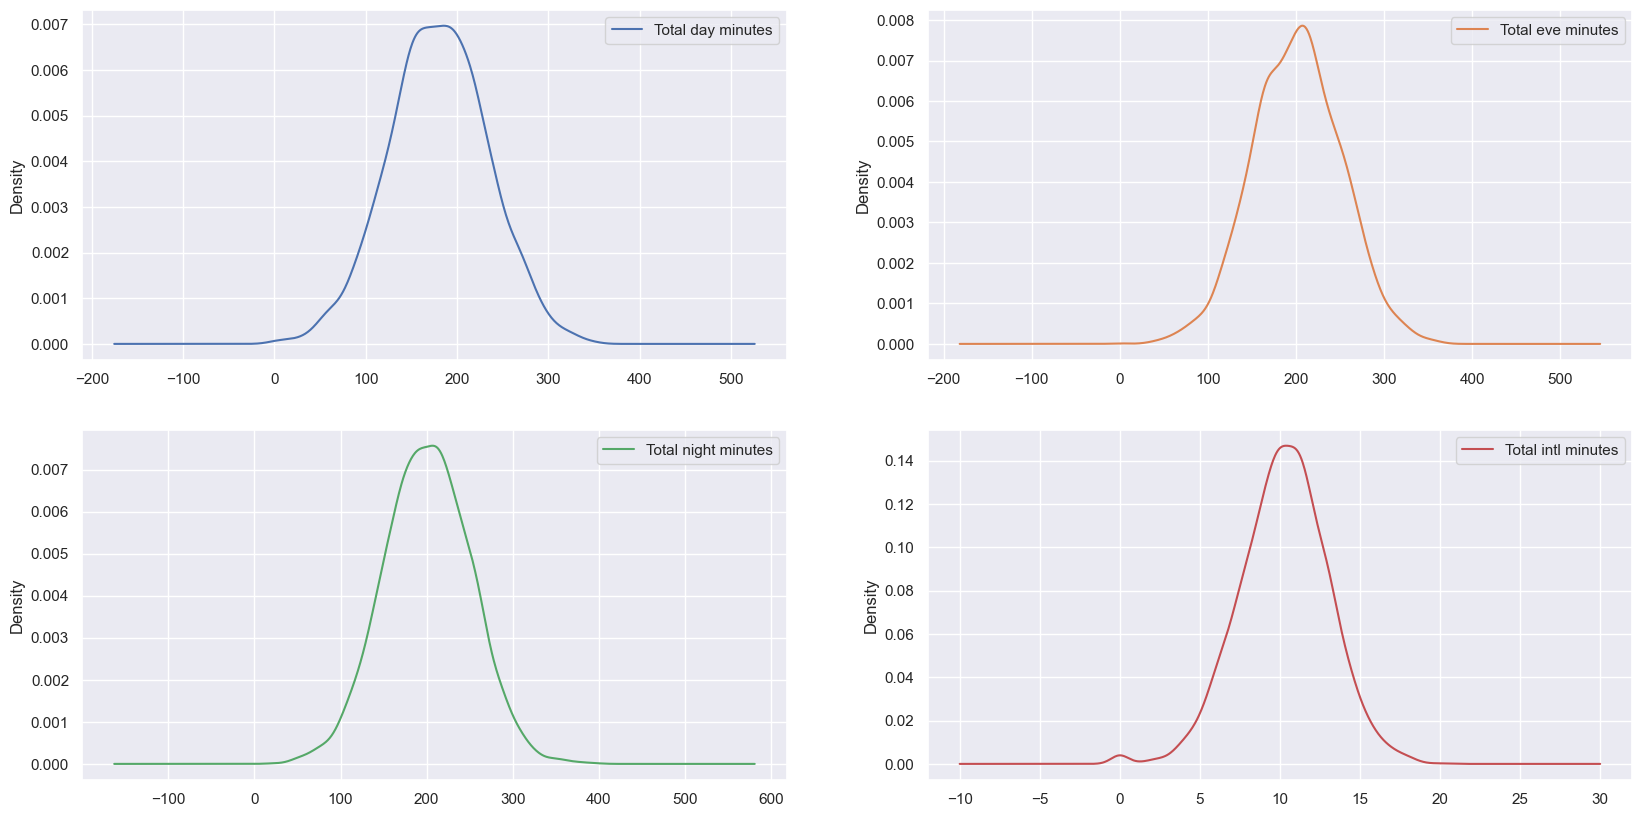

In [17]:
data[features].plot(
    kind="density", subplots=True, layout=(2, 2), sharex=False, figsize=(20, 10)
);

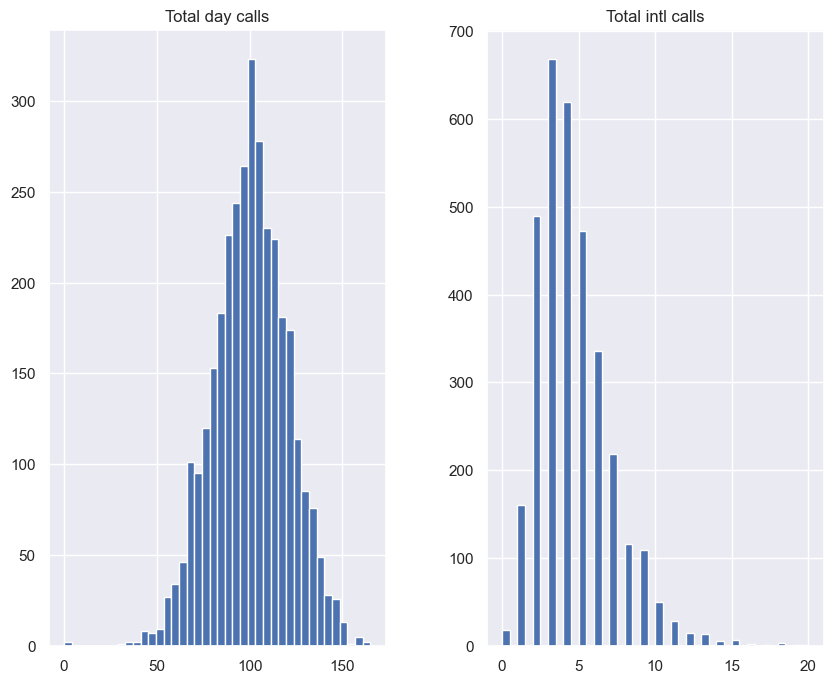

In [18]:
#lets do no of day call and international calls 
features=['Total day calls', 'Total intl calls']    
data[features].hist(bins=40, figsize=(10, 8))   
plt.show()

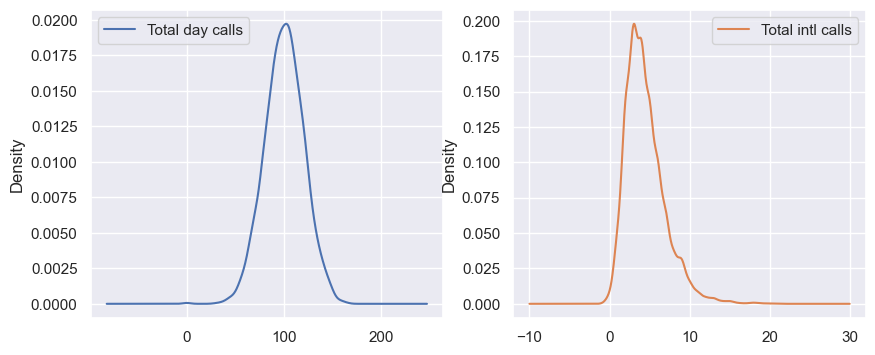

In [19]:
data[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

C:\Users\athun\AppData\Local\Temp\ipykernel_19432\3774567140.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Total intl calls"]);


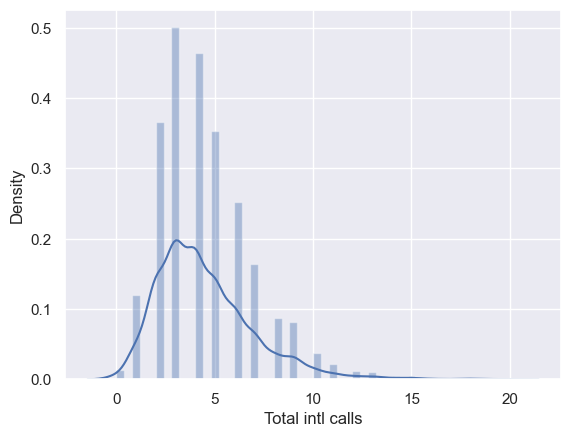

In [24]:
sns.distplot(data["Total intl calls"]);



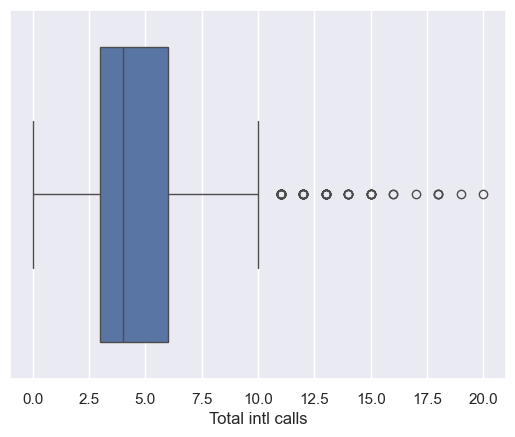

In [25]:


sns.boxplot(x="Total intl calls", data=data);



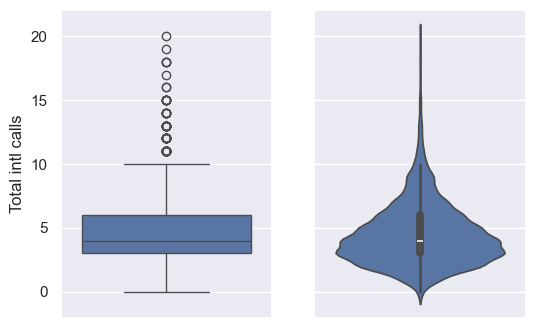

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data["Total intl calls"], ax=axes[0])
sns.violinplot(data=data["Total intl calls"], ax=axes[1]);

<Axes: xlabel='Churn', ylabel='Total day minutes'>

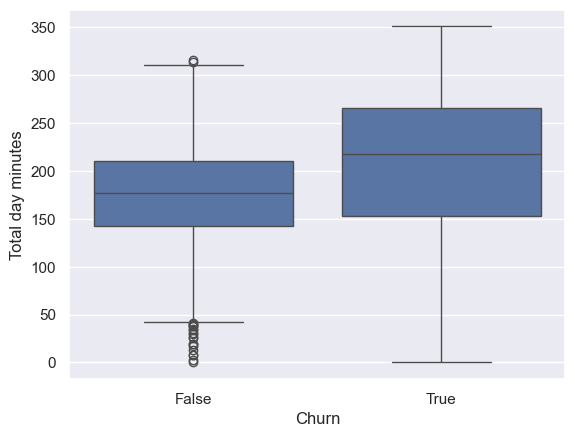

In [27]:
data['Churn'] = data['Churn'].astype('category')
sns.boxplot(x='Churn', y='Total day minutes', data=data)

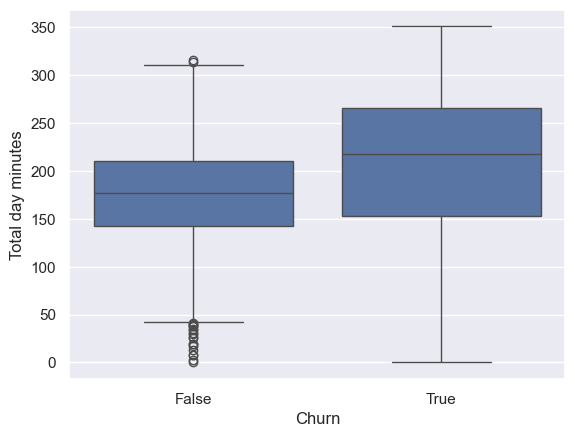

In [28]:
sns.boxplot(x='Churn', y='Total day minutes', data=data)
plt.show()

<Axes: xlabel='Customer service calls', ylabel='count'>

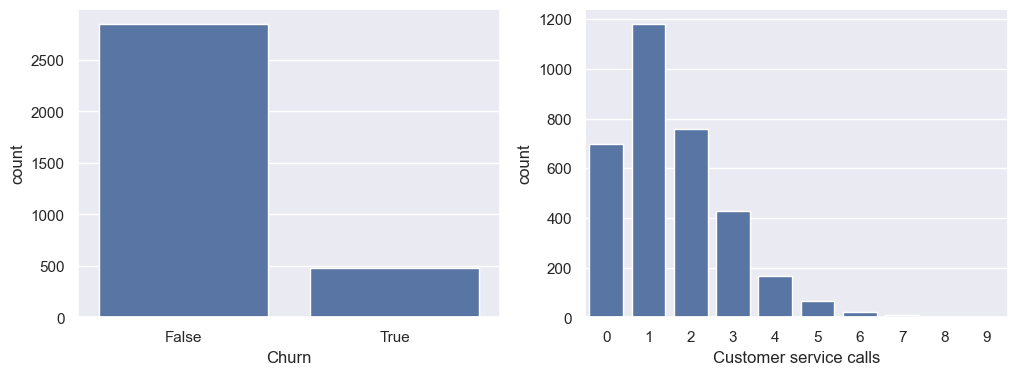

In [38]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=data, ax=axes[0])
sns.countplot(x="Customer service calls", data=data, ax=axes[1])

<Axes: >

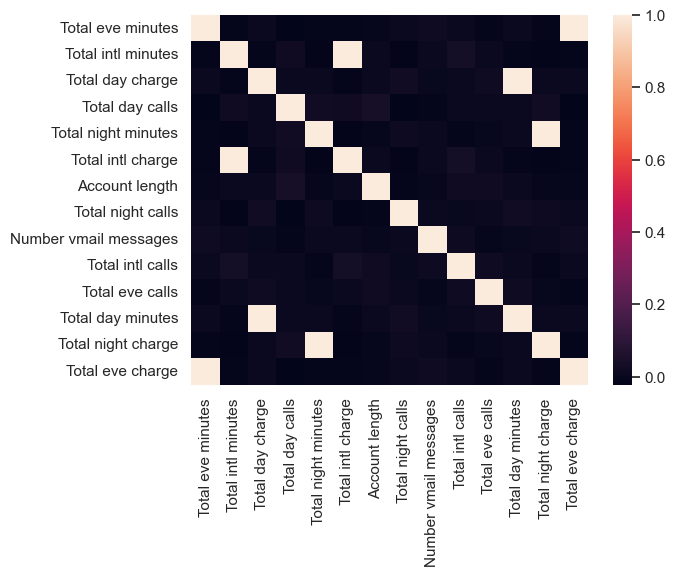

In [41]:
# Drop non-numerical variables
numerical = list(
    set(data.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

In [42]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

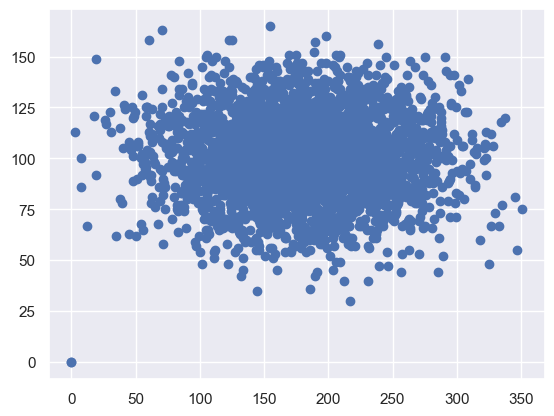

In [44]:
plt.scatter(data['Total day minutes'], data['Total day calls'])

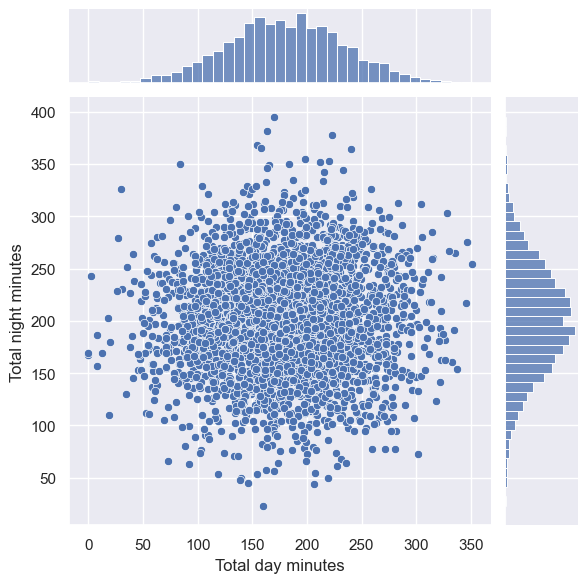

In [45]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=data, kind="scatter");

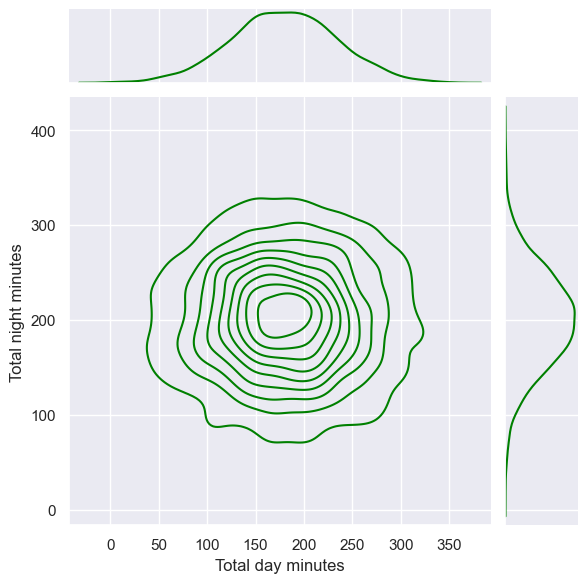

In [49]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=data, kind="kde",color="green");

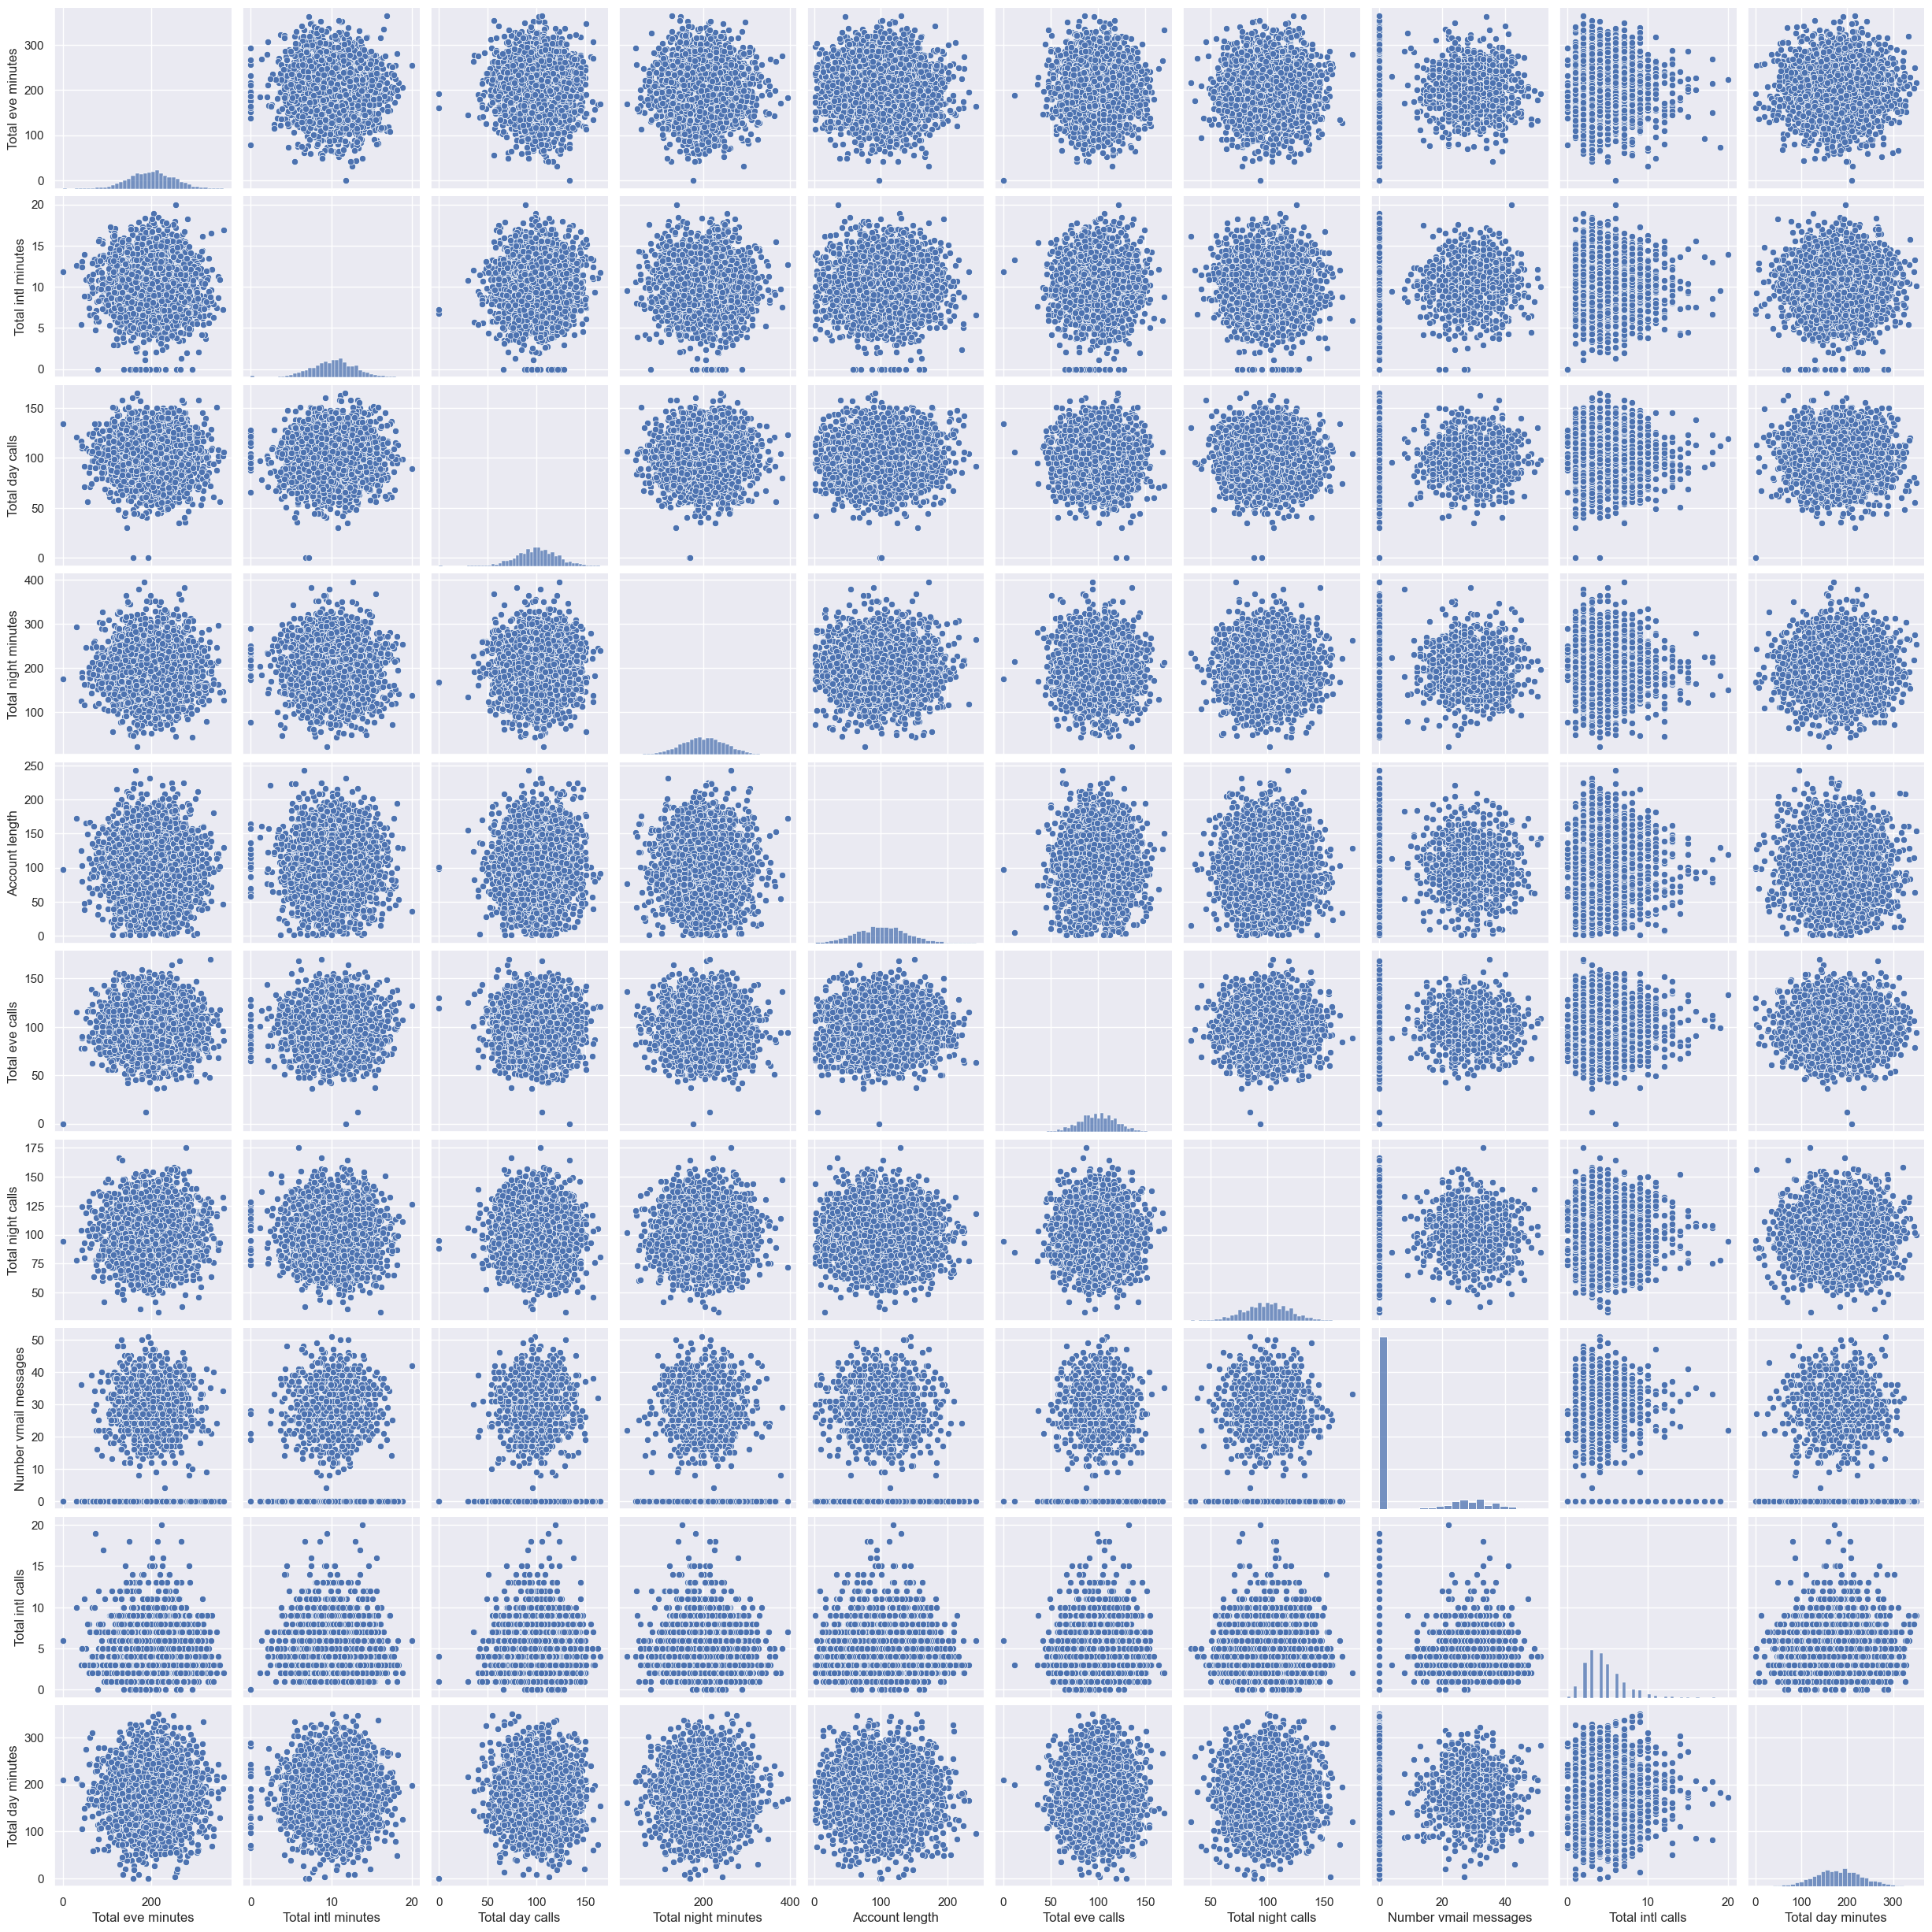

In [50]:
sns.pairplot(data[numerical]);  

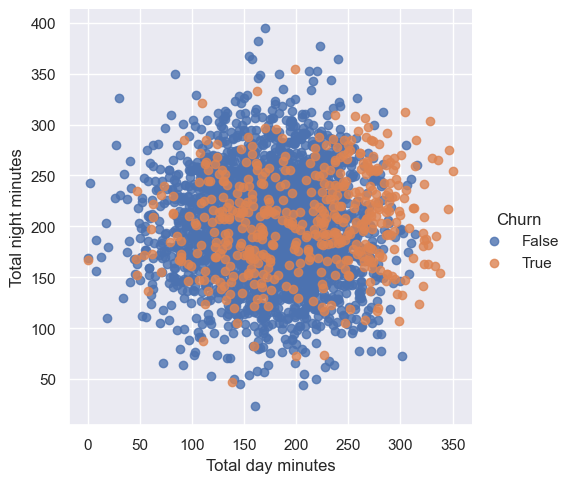

In [54]:
sns.lmplot(
    x="Total day minutes",
    y="Total night minutes",
    data=data,
    hue="Churn",
    fit_reg=False
)


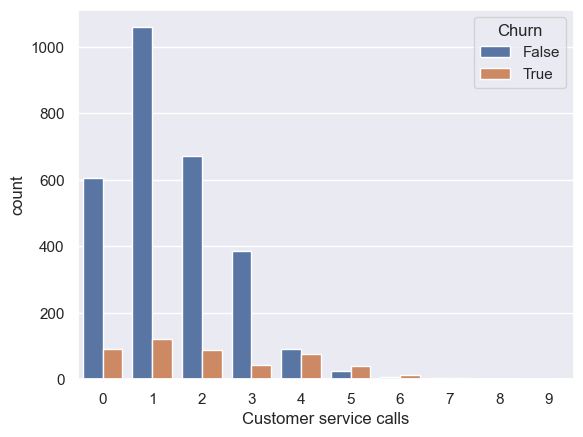

In [56]:
sns.countplot(x="Customer service calls", hue="Churn", data=data);

In [61]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = data.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)


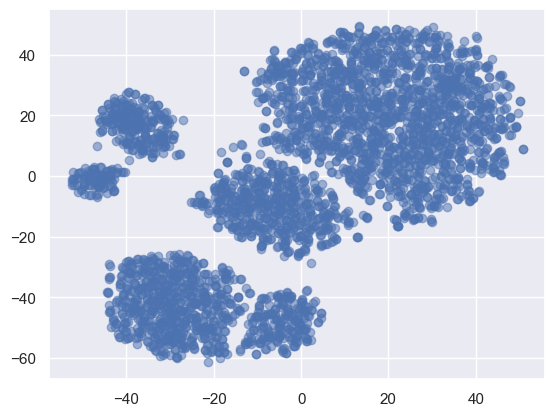

In [62]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

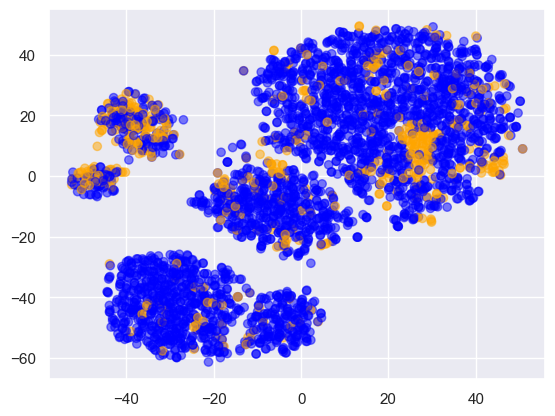

In [64]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=data["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);



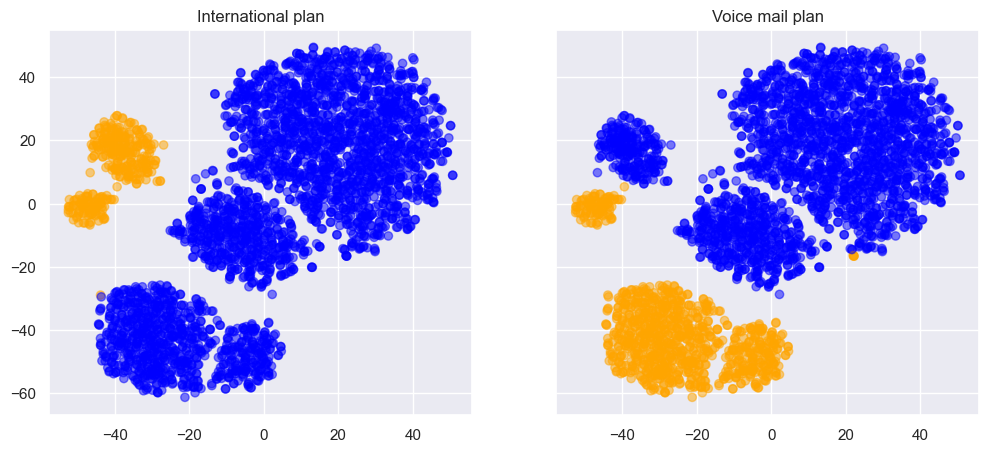

In [65]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=data[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);